#### I have removed the base network from assignment 6A as it is not needed here.



In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import SpatialDropout2D

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

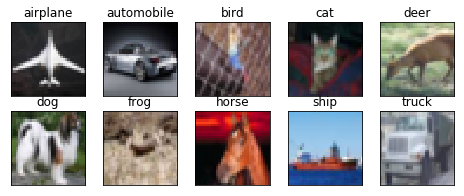

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
Train_labels = np_utils.to_categorical(train_labels, num_classes)
Test_labels = np_utils.to_categorical(test_labels, num_classes)

#### NETWORK WITH OUT CUTOUT

In [7]:
model = Sequential()
model.add(Convolution2D(96, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Convolution2D(192, 3, 3, border_mode='same',activation='relu'))
model.add(Dropout(0.25))
        
model.add(Convolution2D(48, 1, 1,border_mode='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(BatchNormalization())
model.add(Convolution2D(96, 3, 3, border_mode='same',activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Convolution2D(192, 3, 3, border_mode='same',activation='relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(48, 1, 1,border_mode='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Convolution2D(96, 3, 3, border_mode='same',activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Convolution2D(192, 3, 3, border_mode='same',activation='relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(10, 8, 8))
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0626 08:45:00.365376 140466997348224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0626 08:45:00.389100 140466997348224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 08:45:00.393035 140466997348224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0626 08:45:00.428047 140466997348224 deprecation_wrapper.py:119] From /usr/local/lib/python3.

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 96)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 192)       166080    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 192)       0         
__________

In [9]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Defining checkpoints
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/Raajesh-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#### NO CUTOUT

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 37s 95ms/step - loss: 1.4853 - acc: 0.4824 - val_loss: 1.3104 - val_acc: 0.5366

Epoch 00001: val_acc improved from -inf to 0.53660, saving model to /content/gdrive/My Drive/Raajesh-01-0.54.hdf5
Epoch 2/100
390/390 [==============================] - 35s 90ms/step - loss: 0.9652 - acc: 0.6565 - val_loss: 1.0314 - val_acc: 0.6320

Epoch 00002: val_acc improved from 0.53660 to 0.63200, saving model to /content/gdrive/My Drive/Raajesh-02-0.63.hdf5
Epoch 3/100
390/390 [==============================] - 34s 88ms/step - loss: 0.7678 - acc: 0.7292 - val_loss: 0.9154 - val_acc: 0.6794

Epoch 00003: val_acc improved from 0.63200 to 0.67940, saving model to /content/gdrive/My Drive/Raajesh-03-0.68.hdf5
Epoch 4/100
390/390 [==============================] - 34s 88ms/step - loss: 0.6532 - acc: 0.7717 - val_loss: 0.7478 - val_acc: 0.7385

Epoch 00004: val_acc improved from 0.67940 to 0.73850, saving model to /content/gdrive/My Drive/Raajesh-04-0

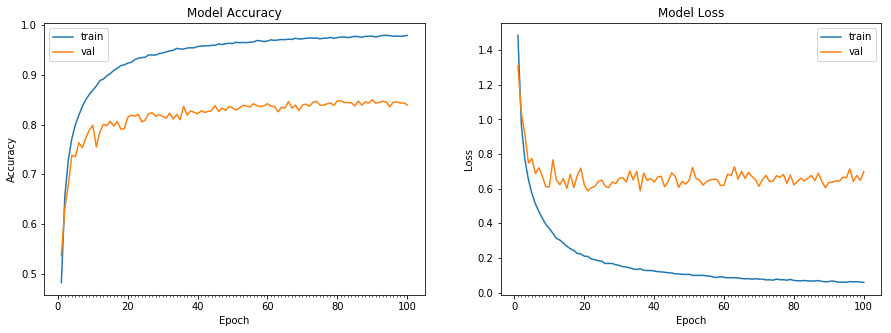

Accuracy on test data is: 83.96


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, Train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, Test_labels), verbose=1, callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, Test_labels, model))

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-90-0.85.hdf5')

#### FINDING MISCLASSIFIED IMAGES TO USE FOR GRADCAM

In [0]:
(Train_features, Train_labels),(Test_features,Test_labels) = cifar10.load_data()
predicted_classes = model.predict_classes(Test_features)
Test_labels = Test_labels.reshape(10000,)
incorrect = np.nonzero(predicted_classes!=Test_labels)
arincorr = incorrect[0][0:25]

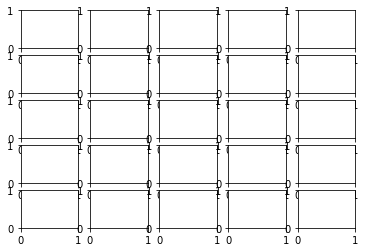

In [17]:
import matplotlib.pyplot as plt

plt.figure(0)
for i in range(5):
    for j in range(5):
        plt.subplot2grid((5,5), (i,j))
plt.show()

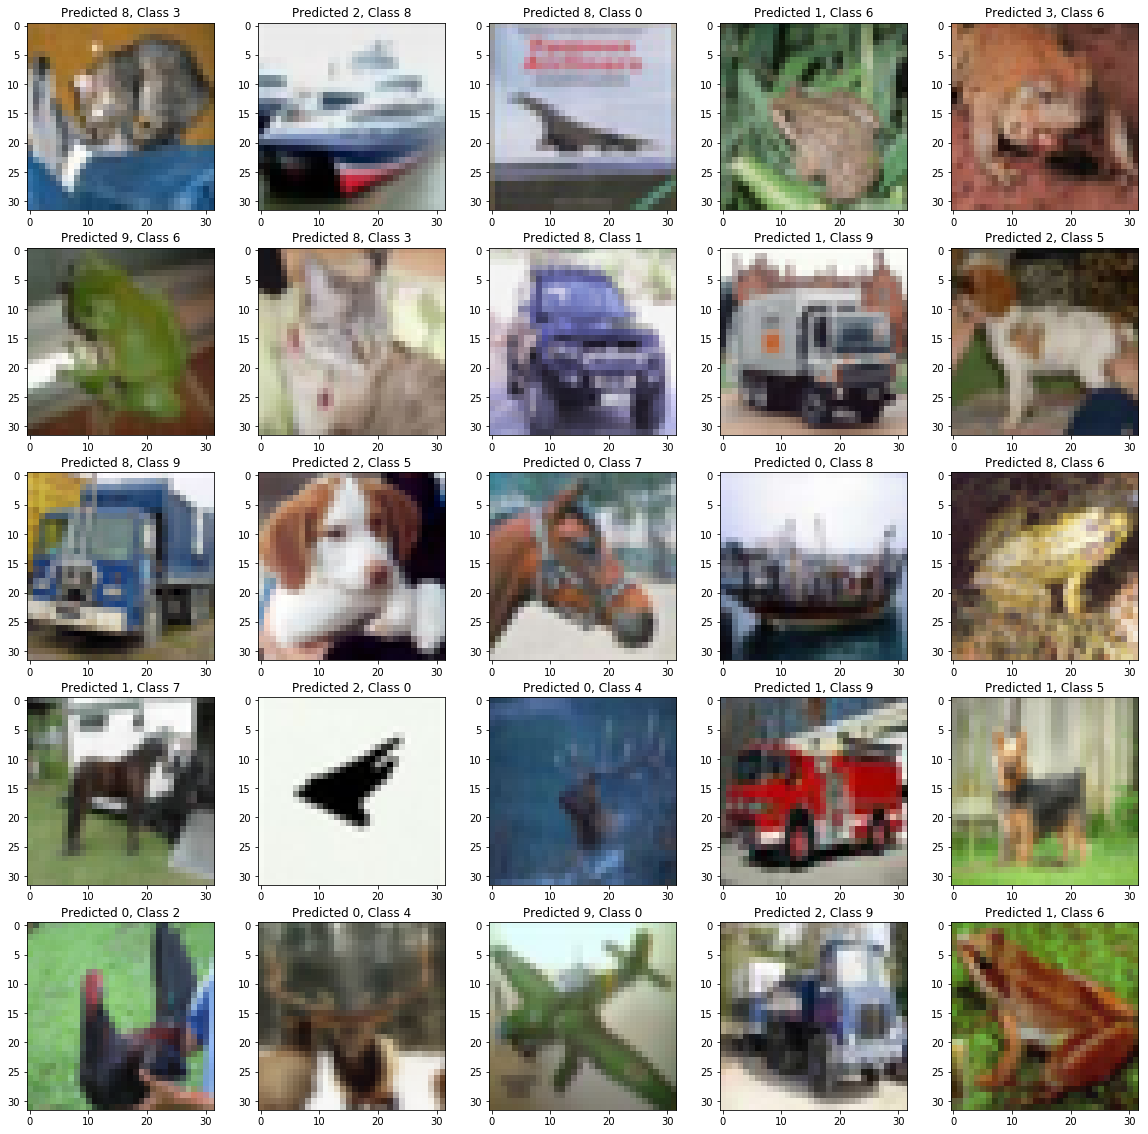

In [18]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(0)
plt.figure(figsize = (20,20)) 
plots = []
count = 0
for i in range(5):
    for j in range(5):
        ax = plt.subplot2grid((5,5), (i,j))
        plt.imshow(Test_features[arincorr[count]].reshape(32,32,3),cmap='gray',interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[arincorr[count]], Test_labels[arincorr[count]]))
        count = count+1
plt.show()

#### USING GRADCAM TO VIEW 4 MISCLASSIFIED IMAGES.

#### I HAVE CHOSEN INDICES [5,9,12,19]

In [0]:
(Train_features, Train_labels),(Test_features,Test_labels) = cifar10.load_data()

In [0]:
misclassified_array = [5,9,12,19]

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

1


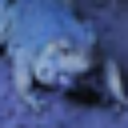

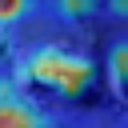

1


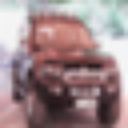

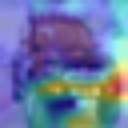

1


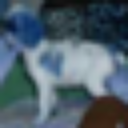

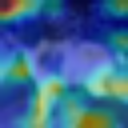

8


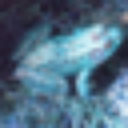

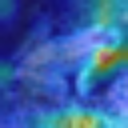

In [24]:
for i in misclassified_array:
  img = Test_features[i]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_8")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for j in range(4):
      conv_layer_output_value[:, :, j] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  (Train_features, Train_labels),(Test_features,Test_labels) = cifar10.load_data()
  img = Test_features[i]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  from google.colab.patches import cv2_imshow
  img = cv2.resize(img,(128,128))
  superimposed_img = cv2.resize(superimposed_img,(128,128))
  cv2_imshow(img)
  cv2_imshow(superimposed_img)
  cv2.waitKey(0)

#### WITH CUTOUT

In [25]:
!wget https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
from random_eraser import get_random_eraser

--2019-06-26 08:50:09--  https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888 [text/plain]
Saving to: ‘random_eraser.py’

random_eraser.py    100%[===================>]     888  --.-KB/s    in 0s      

2019-06-26 08:50:09 (113 MB/s) - ‘random_eraser.py’ saved [888/888]



In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
Train_labels = np_utils.to_categorical(train_labels, num_classes)
Test_labels = np_utils.to_categorical(test_labels, num_classes)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()
W0625 03:55:59.871292 140118683633536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_d

Epoch 1/100
390/390 [==============================] - 39s 99ms/step - loss: 1.6182 - acc: 0.4286 - val_loss: 1.2943 - val_acc: 0.5450

Epoch 00001: val_acc improved from -inf to 0.54500, saving model to /content/gdrive/My Drive/Raajesh-01-0.55.hdf5
Epoch 2/100
390/390 [==============================] - 35s 90ms/step - loss: 1.1044 - acc: 0.6093 - val_loss: 0.9694 - val_acc: 0.6574

Epoch 00002: val_acc improved from 0.54500 to 0.65740, saving model to /content/gdrive/My Drive/Raajesh-02-0.66.hdf5
Epoch 3/100
390/390 [==============================] - 34s 88ms/step - loss: 0.9097 - acc: 0.6812 - val_loss: 0.9062 - val_acc: 0.6906

Epoch 00003: val_acc improved from 0.65740 to 0.69060, saving model to /content/gdrive/My Drive/Raajesh-03-0.69.hdf5
Epoch 4/100
390/390 [==============================] - 34s 88ms/step - loss: 0.8043 - acc: 0.7175 - val_loss: 0.7628 - val_acc: 0.7337

Epoch 00004: val_acc improved from 0.69060 to 0.73370, saving model to /content/gdrive/My Drive/Raajesh-04-0

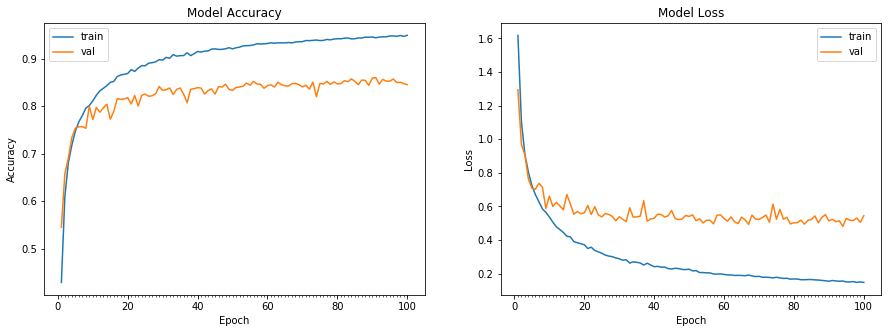

Accuracy on test data is: 84.49


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1))

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, Train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, Test_labels), verbose=1, callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, Test_labels, model))

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-90-0.85.hdf5')

#### USING GRADCAM TO VIEW SAME 4 IMAGES

In [0]:
(Train_features, Train_labels),(Test_features,Test_labels) = cifar10.load_data()

1


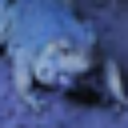

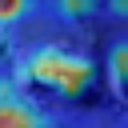

1


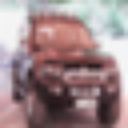

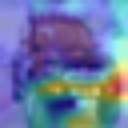

1


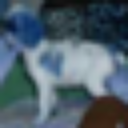

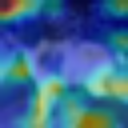

8


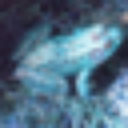

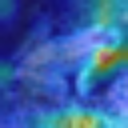

In [30]:
for i in misclassified_array:
  img = Test_features[i]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_8")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for j in range(4):
      conv_layer_output_value[:, :, j] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  (Train_features, Train_labels),(Test_features,Test_labels) = cifar10.load_data()
  img = Test_features[i]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  from google.colab.patches import cv2_imshow
  img = cv2.resize(img,(128,128))
  superimposed_img = cv2.resize(superimposed_img,(128,128))
  cv2_imshow(img)
  cv2_imshow(superimposed_img)
  cv2.waitKey(0)